# Jupyter Notebook Project Example
## Global Food Price Inflation

An example data analysis of a data set on several countries' food price inflation with a variety of plots. Note that this example does not include examples of changing plot aesthetics.

- [Dataset](#Dataset)
- [Fig 1. Simple Line Plot](#Figure-1-Simple-Line-Plot)
- [Fig 2. Line Plot with Legend](#Figure-2-Line-Plot-with-Legend)
- [Fig 3. Line Plot with Twin-Axis](#Figure-3-Line-Plot-with-Twin-Axis)
- [Grouping data with groupby()](#Grouping-data-with-groupby())
- [Fig 4. Bar Graph](#Figure-4-Bar-Graph)
- [Fig 5. Subplots](#Figure-5-Subplots)
- [Statistics](#Statistics)
- [Analysis](#Analysis)

Source: https://www.kaggle.com/datasets/anshtanwar/monthly-food-price-estimates \
View this Notebook on [nbviewer.com](https://nbviewer.org/github/apan-gcs/DS2023/blob/main/Class_Notes/7-Proj-Global_Food_Inflation.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: disable warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
# Import dataset
df = pd.read_csv('WLD_RTFP_country_2023-10-02.csv')

# Converting 'date' column to a datetime object
# Not necessary if your dataset doesn't require it
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.28,"Yemen, Rep.",YEM,2023-06-01
4794,2.79,2.83,2.75,2.81,-1.85,"Yemen, Rep.",YEM,2023-07-01
4795,2.85,2.89,2.81,2.83,-3.17,"Yemen, Rep.",YEM,2023-08-01
4796,2.86,2.97,2.82,2.97,1.68,"Yemen, Rep.",YEM,2023-09-01


In [3]:
# Get all unique values of countries in the dataset
print(df['country'].unique())
print(df['ISO3'].unique())

['Afghanistan' 'Burundi' 'Burkina Faso' 'Central African Republic'
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Gambia, The' 'Guinea-Bissau'
 'Haiti' 'Iraq' 'Lao PDR' 'Lebanon' 'Liberia' 'Mali' 'Myanmar'
 'Mozambique' 'Niger' 'Nigeria' 'Sudan' 'Somalia' 'South Sudan'
 'Syrian Arab Republic' 'Chad' 'Yemen, Rep.']
['AFG' 'BDI' 'BFA' 'CAF' 'CMR' 'COD' 'COG' 'GMB' 'GNB' 'HTI' 'IRQ' 'LAO'
 'LBN' 'LBR' 'MLI' 'MMR' 'MOZ' 'NER' 'NGA' 'SDN' 'SOM' 'SSD' 'SYR' 'TCD'
 'YEM']


In [4]:
# Filter the dataset for specific countries
df_afg = df[df['country']=='Afghanistan']
df_car = df[df['country']=='Central African Republic']
df_mmr =  df[df['country']=='Myanmar']
df_nga =  df[df['country']=='Nigeria']

### Figure 1 Simple Line Plot

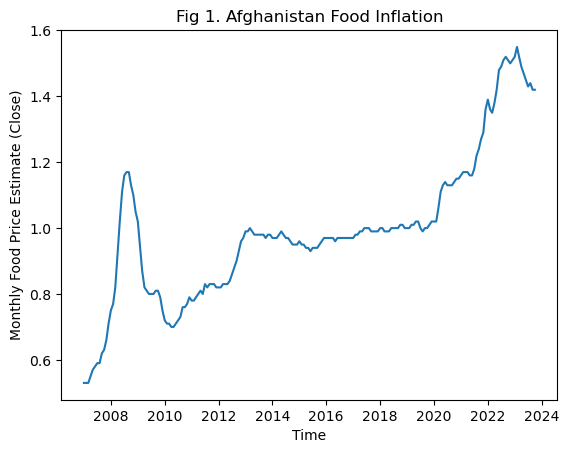

In [5]:
# Fig 1. Plot a line plot of Afghanistan's food price over time (using the closing value)

#plt.style.use('seaborn')

# Create figure and axis
fig1, ax1 = plt.subplots()

# Plot value
ax1.plot(df_afg['date'], df_afg['Close'])

ax1.set_title("Fig 1. Afghanistan Food Inflation")
ax1.set_xlabel("Time")
ax1.set_ylabel("Monthly Food Price Estimate (Close)")
#ax1.set_ylim(0, 1.6)

plt.show()

### Figure 2 Line Plot with Legend

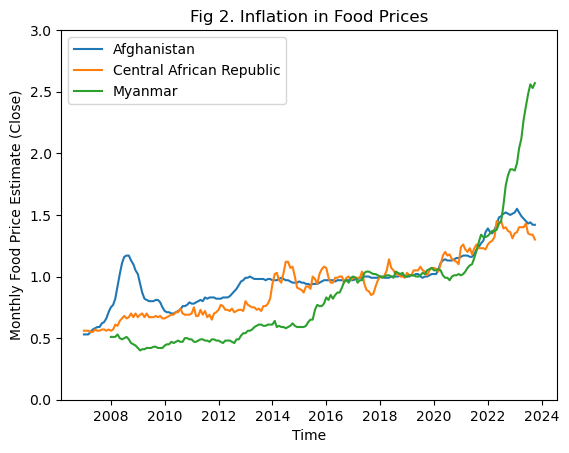

In [6]:
# Fig 2. Plot a line plot of 3 countries' food price over time (using the closing value)
fig2, ax2 = plt.subplots()

# Plot values with labels
ax2.plot(df_afg['date'], df_afg['Close'], label='Afghanistan')
ax2.plot(df_car['date'], df_car['Close'], label='Central African Republic')
ax2.plot(df_mmr['date'], df_mmr['Close'], label='Myanmar')

ax2.legend()

ax2.set_title("Fig 2. Inflation in Food Prices")
ax2.set_xlabel("Time")
ax2.set_ylabel("Monthly Food Price Estimate (Close)")
ax2.set_ylim(0, 3)

plt.show()

### Figure 3 Line Plot with Twin Axis
For a shared / twin axis, see the following link.
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

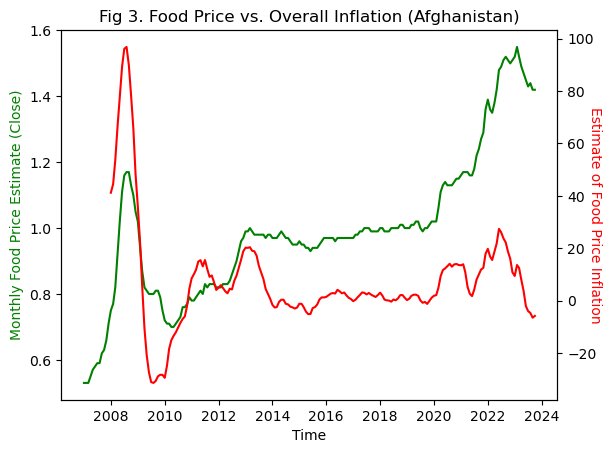

In [7]:
# Fig 3. Plot a two-axis line plot of Afghanistan's food prices and inflation over time

fig3, ax3 = plt.subplots()

# Plot values for food inflation
ax3.plot(df_afg['date'], df_afg['Close'], color='green')

# Create a twin axis to plot overall inflation
ax32 = ax3.twinx()
ax32.plot(df_afg['date'], df_afg['Inflation'], color='red')

ax3.set_title("Fig 3. Food Price vs. Overall Inflation (Afghanistan)")
ax3.set_xlabel("Time")
ax3.set_ylabel("Monthly Food Price Estimate (Close)", color='green')
ax32.set_ylabel("Estimate of Food Price Inflation", rotation=270, color='red')

plt.show()

### Grouping data with groupby()

In [8]:
# Grouping by country, calculating mean for each column
grouped = df.groupby('country').mean()
grouped

,Open,High,Low,Close,Inflation
country,,,,,
Afghanistan,0.993069,1.004257,0.982772,0.993020,7.585579
Burkina Faso,0.925941,0.952376,0.901238,0.926584,8.713789
Burundi,0.901980,0.926040,0.878663,0.902475,8.850684
Cameroon,1.014233,1.018037,1.009816,1.014233,2.789272
Central African Republic,0.922327,0.954455,0.893168,0.926337,6.324526
Chad,1.049455,1.078416,1.019950,1.048366,4.592000
"Congo, Dem. Rep.",0.932376,0.948267,0.916782,0.931881,7.071737
"Congo, Rep.",0.942922,0.956364,0.930130,0.943961,1.503239
"Gambia, The",0.878317,0.889257,0.867574,0.879010,6.809053


### Figure 4 Bar Graph

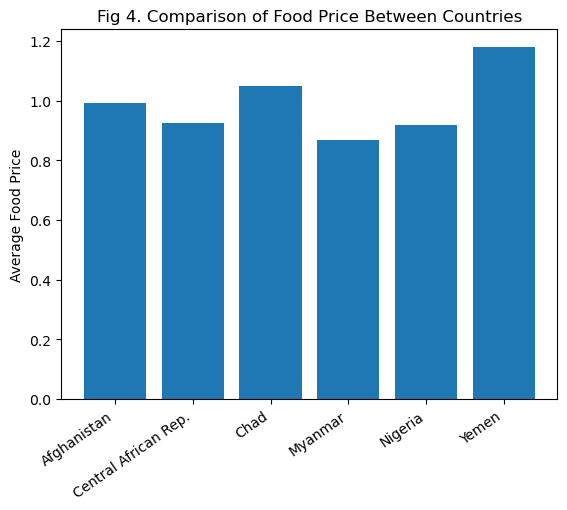

In [9]:
# Fig 4. Plot bar graph for various countries
countries = ['Afghanistan', 'Central African Republic', 'Chad', 'Myanmar', 'Nigeria', 'Yemen, Rep.']

fig4, ax4 = plt.subplots()

ax4.bar(countries, grouped['Close'][countries])

# Format / Rotate labels
labels = ['Afghanistan', 'Central African Rep.', 'Chad', 'Myanmar', 'Nigeria', 'Yemen']
ax4.set_xticklabels(labels, rotation=35, ha='right')

ax4.set_title("Fig 4. Comparison of Food Price Between Countries")
ax4.set_ylabel("Average Food Price")

plt.show()

### Figure 5 Subplots

This example uses 2x2 and indexing, but see the following link for other types.
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

For tight_layout() notes, see:
https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html

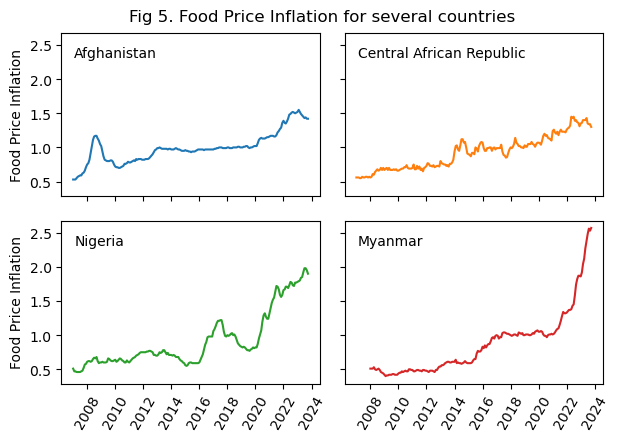

In [10]:
# Fig 5. Plot several subplots of food price

fig5, axs = plt.subplots(2,2, sharex=True, sharey=True)

fig5.tight_layout(pad=2, w_pad=0.2, h_pad=1.0)
fig5.suptitle('Fig 5. Food Price Inflation for several countries')

# Plot values for food price
axs[0,0].plot(df_afg['date'], df_afg['Close'])
#set_title("Afghanistan")
axs[0,0].text(0.05, 0.85, 'Afghanistan', ha='left', transform=axs[0,0].transAxes)
axs[0,0].set_ylabel("Food Price Inflation")

axs[0,1].plot(df_car['date'], df_car['Close'], color='tab:orange')
#axs[0,1].set_title("Central African Republic")
axs[0,1].text(0.05, 0.85, 'Central African Republic', ha='left', transform=axs[0,1].transAxes)

axs[1,0].plot(df_nga['date'], df_nga['Close'], color='tab:green')
#axs[1,0].set_title("Nigeria")
axs[1,0].text(0.05, 0.85, 'Nigeria', ha='left', transform=axs[1,0].transAxes)
axs[1,0].set_ylabel("Food Price Inflation")

axs[1,1].plot(df_mmr['date'], df_mmr['Close'], color='tab:red')
#axs[1,1].set_title("Myanmar")
axs[1,1].text(0.05, 0.85, 'Myanmar', ha='left', transform=axs[1,1].transAxes)

fig5.autofmt_xdate(rotation=60, ha='center')

plt.show()

## Statistics
https://docs.scipy.org/doc/scipy/reference/stats.html

In [11]:
import scipy.stats as stats

# x = Time, y = Food Inflation Rate (close)
# Note: .astype(int) converts the date to an integer in order to calculate correlation
results = stats.pearsonr(df_afg['date'].astype(int), df_afg['Close'])

print("Pearson's R:", results[0])
print("p-value:", results[1])

Pearson's R: 0.8247336456023736
p-value: 2.1055553636107725e-51


## Analysis

[Figure 3](#Figure-3-Line-Plot-with-Twin-Axis) was an interesting figure that showed the estimated food price versus the inflation in food price (essentially the derivative) for Afghanistan. The largest spikes in inflation were around 2008 and 2022, after the food price went down slightly.

In [Figure 5](#Figure-5-Subplots), comparing different countries' food price inflation, it seems that Myanmar experienced a much higher jump in food inflation rate, particularly in 2022-23, despite having the lowest average in [Figure 4](#Figure-4-Bar-Graph). This could be due to the ongoing civil war which started in 2021. In comparison, Central African Republic was quite steady in inflation, with only small-scale fluctuations and a slight upward trend. 

In the [Statistics](#Statistics) section, a simple Pearson's correlation test is performed between food inflation and time. The R value was 0.8247, which indicates a strong positive correlation (where 1 is a perfect positive correlation). This indicates that the price of food goes up over time with a strong correlation.